#### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 4 : Utilitzar les biblioteques de visualització de dades Matplotlib o Seaborn**

## Tasca M4 T01 - Exercicis gràfics amb Matplotlib i Seaborn

* Ús de les llibreries gràfiques
* Apendre a representar dades d'un Dataframe
* Ànalisis i extrapolació de les gràfiques

___________
*Lliurament:Enviar l'URL a un repositori anomenat visualització_exploratòria que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.*
___________

## EXERCICI 1 : Resumeix estadísticament i gràficament el dataset *preu lloguer per trimestre i barri.csv* en la web OpenDataBCN.


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


### **1.0 Visualització, resum del dataframe original i treballs previs**


* **Descarregant el Dataset en un Pandas Dataframe desde la ruta local per veure fer-se una idea les seves diverses parts:**

    - Es un dataframe que mostra dades de diverses propietats barceloneses que hi havia per lloguer l'any 2021. 
    - Per cada rang, tenim el any (2021), el trimestre (1-4), el codi i nom del seu districte, el codi i el nom del seu barri
    - Lloguer_mitja sembla ser un concepte per veure el lloguer per preu total mensual, o per bé per preu per superfície mensual 
    - Té 8 columnes, 584 entrades, que en un principi cap no és nul, que 4 variables són de tipus int64 i 4 són objectes o cadenes.

In [3]:
data = pd.read_csv('C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/IT-DATA-SCIENCE/DS-Sprint4-Visual_Seaborn-Matplotlib/preu_lloguer_trimestre_barri.csv')
data


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [5]:
data.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


* **A continuació veiem les dades mínimes i máximes per cada variable. En el cas de les cadenes, és per ordre alfaètic.**
    - Els districtes van de l'u al 10 i els barris, de l'u al 73.
    - Lloguer mitjà té al menys dos valors, ambdòs cadenes de text.
    - El preu en aquesta part ens mostra dades com ara '--' i el preu màxim de 998,8 € sembla massa baix coneixent la ciutat. 
    - El aspecte del preu tal com està imputat potser compliquin els càlculs i que probablement es tindràn que trasformar per treballar correctament.

In [6]:
data.max()

Any                                                      2021
Trimestre                                                   4
Codi_Districte                                             10
Nom_Districte                             Sarrià-Sant Gervasi
Codi_Barri                                                 73
Nom_Barri                                     les Tres Torres
Lloguer_mitja     Lloguer mitjà per superfície (Euros/m2 mes)
Preu                                                    998.8
dtype: object

In [7]:
data.min()

Any                                            2021
Trimestre                                         1
Codi_Districte                                    1
Nom_Districte                          Ciutat Vella
Codi_Barri                                        1
Nom_Barri                             Baró de Viver
Lloguer_mitja     Lloguer mitjà mensual (Euros/mes)
Preu                                             --
dtype: object

- **Tot i que algunes dades semblen manquants o inexactes, oficialment no figura cap valor nul**

In [8]:
data.count()

Any               584
Trimestre         584
Codi_Districte    584
Nom_Districte     584
Codi_Barri        584
Nom_Barri         584
Lloguer_mitja     584
Preu              584
dtype: int64

In [9]:
data.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

- **Veiem el nombre de valors únics per cada variable : interessa veure sobretot "Lloguer_mitja" i "Preu"**

In [10]:
data.nunique()

Any                 1
Trimestre           4
Codi_Districte     10
Nom_Districte      10
Codi_Barri         73
Nom_Barri          73
Lloguer_mitja       2
Preu              331
dtype: int64

- **Observem exactament quins són els valors únics de la variable "Preu", imprescindible per passar a les següent etapes**

In [11]:
# veure quantes dates úniques (331) n'hi han a la columna 'Preu' i com són : dtype=object, 'strings'
# es tindrá que canviar el tipus de variable del "Preu" a int64

data['Preu'].unique()

array(['759.2', '929.6', '808.9', '879.4', '918.0', '887.1', '1176.7',
       '1040.2', '964.0', '898.7', '781.6', '--', '810.6', '799.5',
       '778.4', '807.6', '788.1', '829.1', '990.3', '927.3', '1598.2',
       '1531.7', '1263.9', '1578.0', '1264.8', '1294.9', '990.1', '959.0',
       '745.4', '859.1', '910.6', '865.3', '817.3', '741.1', '791.7',
       '795.0', '668.8', '716.1', '700.5', '741.4', '827.0', '747.4',
       '736.5', '707.2', '687.2', '691.6', '762.5', '643.6', '631.6',
       '671.8', '605.0', '520.2', '625.1', '658.9', '759.3', '756.9',
       '824.2', '814.5', '853.6', '927.5', '1298.9', '928.5', '978.4',
       '704.2', '976.7', '794.6', '740.8', '12.8', '12.3', '15.5', '13.3',
       '12.9', '13.5', '13.0', '13.7', '13.6', '12.5', '11.6', '12.7',
       '12.2', '13.2', '13.8', '14.0', '15.7', '15.6', '16.0', '15.2',
       '14.3', '14.1', '14.2', '11.4', '11.8', '10.4', '11.2', '11.9',
       '11.3', '11.5', '11.0', '9.9', '9.3', '9.0', '10.7', '10.9',
       '

* **Veient el estat dels valors únics de preu, es decideix filtrar el datdframe original com a copia, per a qué tingui només els preus existents (que tinguin un valor real)**
    - Aquesta decisió es pren per poder analitzar dades amb exactitud
    - Es pren després de veure les preguntes de l'exercici, que proposen certes observacions per barri o districte, però sense exigir cap dels dos en concret
    - Es pren després de concloure que els districtes ón falten dades remandrán els més representats de totes maneres, amb dades superiors en nombre als altres 
    - Els preus '--' es mantenen al dataframe original, però es crea en paral·lel un altre amb les dades exactes per poder fer cálculs i comparacions.
    - Aquest dataframe té 540 entrades (44 menys que el original, que ens servirà igualment per treure informació de qualitat de les dades (que potser errors o manquances a les respostes rebudes)
    - El tipus se canvia de cadena de text / "object", a "float64" / número decimal

In [12]:
# decidir qué fer amb els preus '--' 

preu_existent=data[(data.Preu != '--')]

# convertir la consulta on totes les entrades sí contenen preus a un nou dataframe per poder treballar millor
preu_existent=pd.DataFrame(preu_existent)
preu_existent

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [13]:
# comprovem que s'han tret els que marquaven "--": 
# 540 entr canviar el tipus de variable del "Preu" a int64ies non-null (eren 584), dtypes: float64 (1)
# comprovem que el tipus de data dels preus s'ha transformat i canvià el tipus de variable de "Preu" cap a float64 :

preu_existent.Preu=preu_existent.Preu.astype('float64')
preu_existent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


* **Per decidir com seguir, veure quantes dates úniques n'hi han a la columna 'Lloguer_mitja' : són textos de conceptes i no de preus**
    - Dividim el nou dataframe amb els preus complerts, segons el input de la columna comuna: 
    
        "Lloguer_mitja": "Lloguer mitjà mensual (Euros/mes)" 
        
        "Lloguer mitjà per superfície (Euros/m2 mes)"
    - Ara cada columna només té els tipus de preus que li corresponen : €/m2 al mes, o bé € al mes

In [14]:
data['Lloguer_mitja'].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

* **Consulta dels preus mensuals totals €/mes:**

In [15]:
mensual = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]
mensual.sort_values(by=['Preu'], ascending=False)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
312,2021,3,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1816.5
166,2021,2,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1680.3
458,2021,4,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1679.3
20,2021,1,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1598.2
461,2021,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1597.4
...,...,...,...,...,...,...,...,...
346,2021,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),547.7
492,2021,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),546.8
54,2021,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),520.2
200,2021,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),488.1


* **Consulta dels preus mensuals per superfície,o  €/m2/mes:**

In [16]:
m2_mes = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)')]
m2_mes.sort_values(by=['Preu'], ascending=False)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
532,2021,4,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",Lloguer mitjà per superfície (Euros/m2 mes),18.0
285,2021,2,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),17.3
139,2021,1,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),17.3
433,2021,3,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.9
513,2021,4,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),16.4
...,...,...,...,...,...,...,...,...
565,2021,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),9.2
127,2021,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),9.0
267,2021,2,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),8.7
273,2021,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),8.1


* **Consulta dels rangs de preus mensuals mínims i màxims de cada tipus, que ajuden a decidir els rangs dels gràfics a continuació :**

In [17]:
print('€/mes màxim :', mensual['Preu'].unique().max())
print('€/mes minim :',mensual['Preu'].unique().min())
print('€/m2/mes màxim:', m2_mes['Preu'].unique().max())
print('€/m2/mes minim:', m2_mes['Preu'].unique().min())

€/mes màxim : 1816.5
€/mes minim : 447.5
€/m2/mes màxim: 18.0
€/m2/mes minim: 6.7


### **1.1 Visualització d'una variable categòrica (Districte o Barri)**


- En aquesta primera part utilitzem el dataframe original que inclou els preus manquants, per deixar poder veure la proporció de dades reals 

- Deixa constància de quina proporció de dades existeixen, i si no en tenim, saber de quines zones provenen.

- Representa en percentatge la proporció que ocupa cada districte dins de l'estudi

- Veiem que gairebé la meitat de les dades provenen de Nou Barris, Horta-Guinardó i Sant Martí ; amb Sants-Montjüic ja sumen més del 50% dels lloguers compilats

- El segón gràfic mostra el rang dels districtes per representació en nombre d'observacions acumulades

In [19]:
# Totes les entrades del dataframe original per districtes

Districte=data.groupby(['Nom_Districte'])['Nom_Districte'].count()
Districte

Nom_Districte
Ciutat Vella            32
Eixample                48
Gràcia                  40
Horta-Guinardó          88
Les Corts               24
Nou Barris             104
Sant Andreu             56
Sant Martí              80
Sants-Montjuïc          64
Sarrià-Sant Gervasi     48
Name: Nom_Districte, dtype: int64

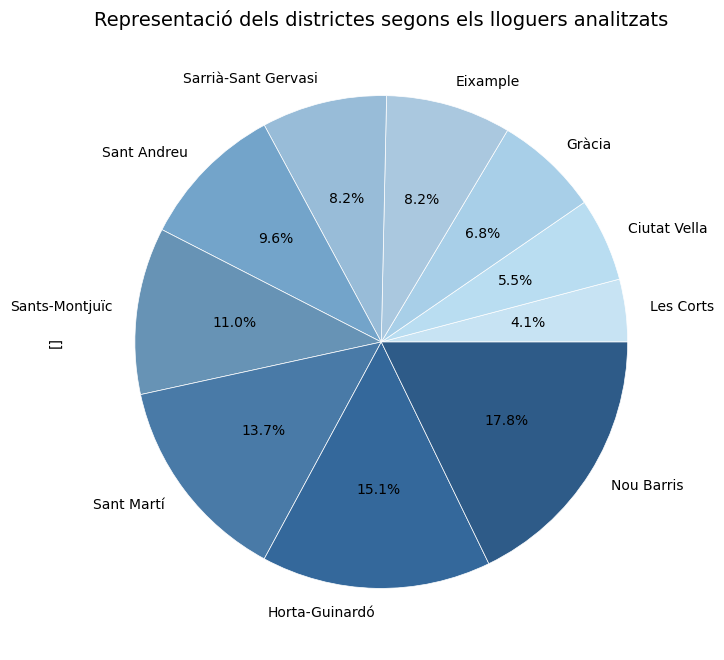

In [20]:
colors = ['#C7E3F3', '#B9DDF1', '#A8CFE8', '#AAC8DF','#98BCD8', '#73A4CA', '#6793B5','#497AA7', '#34689B', '#2E5B88'] 

Districte.sort_values(ascending=True).plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=10, 
                                           colors=colors, wedgeprops={"linewidth" : 0.5, "edgecolor" : "white"})
plt.title('Representació dels districtes segons els lloguers analitzats', fontsize=14)
plt.ylabel([])  

# Exportar el gràfic:
plt.savefig('Sprint4_1.png', dpi=150, transparent=True)  

plt.show()

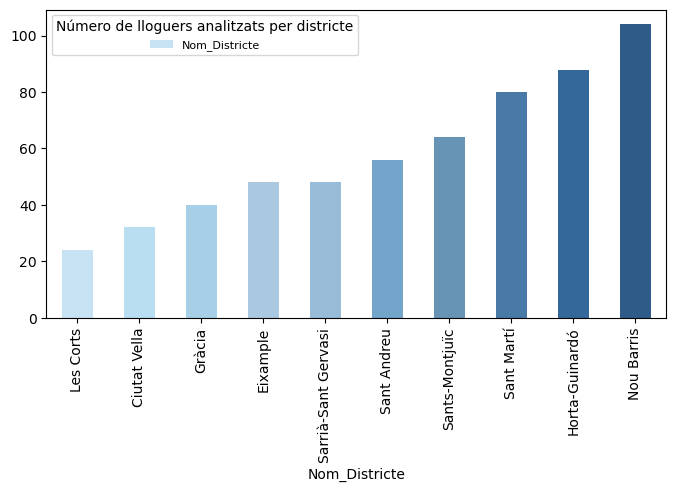

In [21]:
# Rang dels districtes per representació en nombre d'observacions acumulades en el dadaset original

Districte=data.groupby(['Nom_Districte'])['Nom_Districte'].count()

colors = ['#C7E3F3', '#B9DDF1', '#A8CFE8', '#AAC8DF','#98BCD8', '#73A4CA', '#6793B5','#497AA7', '#34689B', '#2E5B88']  # creamos una lista de dos colores
Districte.sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors) #creamos el plot con el df anterior 
plt.legend(title="Número de lloguers analitzats per districte", loc="upper left", fontsize=8)

# Exportar el gràfic:
plt.savefig('Sprint4_2.png', dpi=150, transparent=True) 

plt.show()

* **A la propera secció comparem les dades complertes amb les manquantes**

    - Això es per poder veure la qualitat dels valors obtinguts en funció a la fracció que s'ha pogut extreurede les respostes i quina part no els té

    - Ens donarà el rang dels districtes per qualitat de la informació (tant en lloguers mensuals que per preu/m2)
    
    - I el calcul del percentatge de respostes complertes obtingudes, amb les que es treballarà desprès

In [22]:
# Només les entrades del dataframe degudament complertes, per districtes

Districte_respons=preu_existent.groupby(['Nom_Districte'])['Nom_Districte'].count()
Districte_respons

Nom_Districte
Ciutat Vella           32
Eixample               48
Gràcia                 40
Horta-Guinardó         80
Les Corts              24
Nou Barris             80
Sant Andreu            52
Sant Martí             80
Sants-Montjuïc         56
Sarrià-Sant Gervasi    48
Name: Nom_Districte, dtype: int64

In [23]:
# calcul del percentatge de respostes complertes obtingudes, amb les que es treballarà a continuació

percent_respons=Districte_respons/Districte*100
percent=percent_respons.round(0)
percent

Nom_Districte
Ciutat Vella           100.0
Eixample               100.0
Gràcia                 100.0
Horta-Guinardó          91.0
Les Corts              100.0
Nou Barris              77.0
Sant Andreu             93.0
Sant Martí             100.0
Sants-Montjuïc          88.0
Sarrià-Sant Gervasi    100.0
Name: Nom_Districte, dtype: float64

    
- Veiem qu'allà on les recopilacions són més nombroses és on hi ha un percentatge més grans d'errors, o dades no terminades.
- Són disctictes tradicionalment humils i amb preus més baixos que la resta (es comprovarà desprès)
- S'observa que dels 10 districtes, 6 mostren un grau de resposta del 100 %.

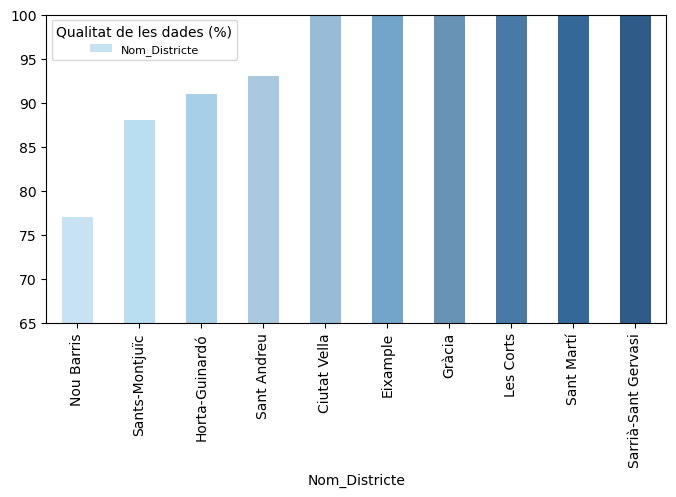

In [24]:
# Rang dels districtes per qualitat de la informació (tant en lloguers mensuals que per preu/m2)

percent.sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors)
plt.ylim(65, 100)
colors = ['#C7E3F3', '#B9DDF1', '#A8CFE8', '#AAC8DF','#98BCD8', '#73A4CA', '#6793B5','#497AA7', '#34689B', '#2E5B88']
plt.legend(title="Qualitat de les dades (%)", loc="upper left", fontsize=8)

# Exportar el gràfic:
plt.savefig('Sprint4_3.png', dpi=150, transparent=True) 

plt.show()


### **1.2 Visualització per una variable numèrica (Preu)**


- El gràfic de "Preus per superfície dels lloguers analitzats" utilitza el dataset filtrat dels preus existents (no nuls, sense incògnites) 
- Permet veure totes les dades de preu al m2 degudament omplertes unitat per unitat i la magnitud de les seves diferències. 

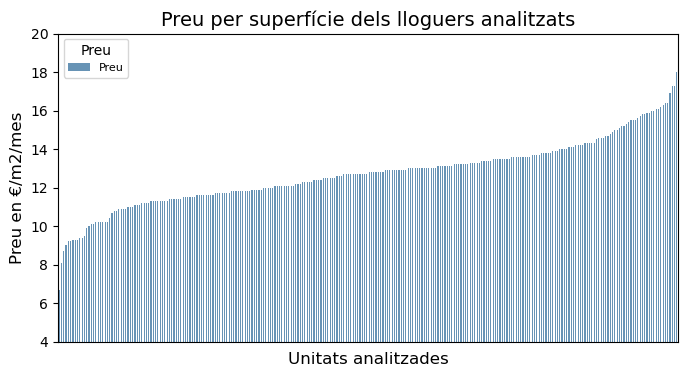

In [25]:
colors = ['#6793B5']
m2_mes['Preu'].sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors)

plt.legend(title="Preu", loc="upper left", fontsize=8)
plt.title('Preu per superfície dels lloguers analitzats', fontsize=14)
plt.xlabel('Unitats analitzades', fontsize=12)
plt.ylabel('Preu en €/m2/mes', fontsize=12)
plt.ylim(4, 20)
# disabling yticks by setting yticks to an empty list
plt.xticks([])  

# Exportar el gràfic:
plt.savefig('Sprint4_4.png', dpi=150, transparent=True) 

plt.show()


- El gràfic de "Preus dels lloguers mensuals analitzats" mostra totes les dades de preu total unitat per unitat i amb la seva magnitud.
- Es sembla al anterior, però aqui computa també el tamany dels pisos i cases, així disparant-se les desigualtats entre pisos petits i grans, el seu estat i situació.

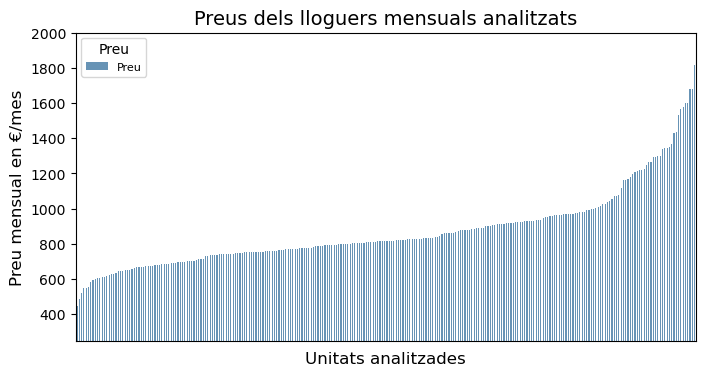

In [27]:
colors = ['#6793B5']

mensual['Preu'].sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors)
plt.legend(title="Preu", loc="upper left", fontsize=8)

plt.title('Preus dels lloguers mensuals analitzats', fontsize=14)
plt.xlabel('Unitats analitzades', fontsize=12)
plt.ylabel('Preu mensual en €/mes', fontsize=12)
plt.ylim(250, 2000)
plt.xticks([])  

# Exportar el gràfic:
plt.savefig('Sprint4_4.png', dpi=150, transparent=True) 

plt.show()

- El histògram aqui baix deriva del gràfic de barres "Preu en €/m2/mes" i mostra que la majoria de pisos es lloguen per 11 a 15 € el m2 al mes.
- Té una forma de campana invertida i es bastant centrat.

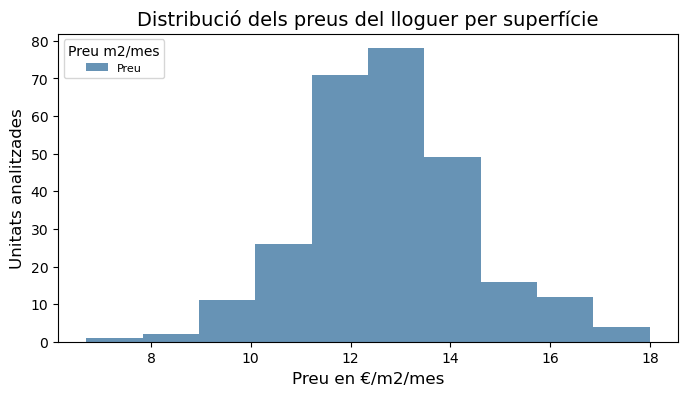

In [29]:
m2_mes['Preu'].plot(kind="hist", figsize = (8,4), color=colors) 

colors = ['#6793B5']
plt.legend(title="Preu m2/mes", loc="upper left", fontsize=8)
plt.title('Distribució dels preus del lloguer per superfície', fontsize=14)
plt.xlabel('Preu en €/m2/mes', fontsize=12)
plt.ylabel('Unitats analitzades', fontsize=12)

# Exportar el gràfic:
plt.savefig('Sprint4_6.png', dpi=150, transparent=True) 

plt.show()

- El histògram aqui baix deriva del gràfic "Preu mensual en €/mes" i mostra que la gran majoria de pisos es lloguen per entre 600 i 1000 € mensuals
- Per altra banda, hi han uns pocs pisos de lloguer en els següents rangs que deuen ser més grans, més bé situats, de disseny, que formen la base del rang dels 1000-1900 €.
- Els pisos sota 600 € o per sobra de 1500 € mensuals són una excepció.

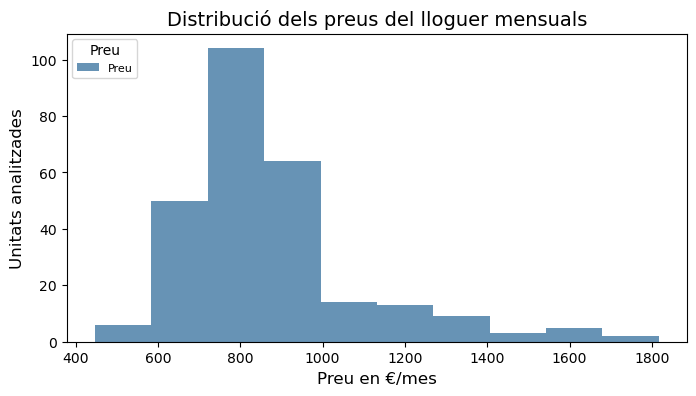

In [31]:
mensual['Preu'].plot(kind="hist", figsize = (8,4), color=colors)

colors = ['#6793B5']
plt.legend(title="Preu", loc="upper left", fontsize=8)
plt.title('Distribució dels preus del lloguer mensuals', fontsize=14)
plt.xlabel('Preu en €/mes', fontsize=12)
plt.ylabel('Unitats analitzades', fontsize=12)

# Exportar el gràfic:
plt.savefig('Sprint4_7.png', dpi=150, transparent=True) 

plt.show()

### **1.3 Visualització per una variable numèrica i una categòrica (Districte i Preu)**


- En aquesta part observem com el preus i els districtes es corresponen i es complementes entre el histògram, els gràfics de distribució / densitat i el heatmap.
- Podem comprovar les mateixes tendències de distribució segons els llocs i els preus que ens anunciaven els dos histògrams anteriors:
- Ressalten que a Ciutat Vella, Sants-Montjuïc, Horta-Guinardó i Nous Barris es formen "picos", que indiquen que els preus són fortament marcats dins d'un rang concert.
- Sant Martí, Sarrià-Sant-Gervasi i Les Corts són els districtes amb els preus mès diversos, probablement degut als seus barris i tipus d'edificis mólt diferents entre si.

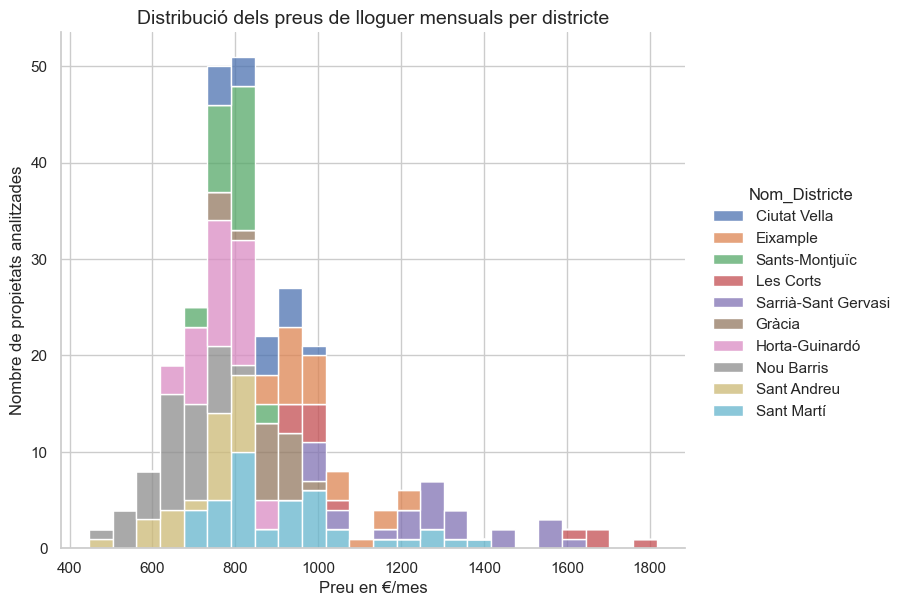

In [35]:
# seaborn :
sns.displot(mensual, x="Preu",hue="Nom_Districte", multiple="stack", height=6, aspect=1.2)

plt.title('Distribució dels preus de lloguer mensuals per districte', fontsize=14)
plt.xlabel('Preu en €/mes', fontsize=12)
plt.ylabel('Nombre de propietats analitzades', fontsize=12)

# Exportar el gràfic:
plt.savefig('Sprint4_8.png', dpi=150, transparent=True) 

plt.show()

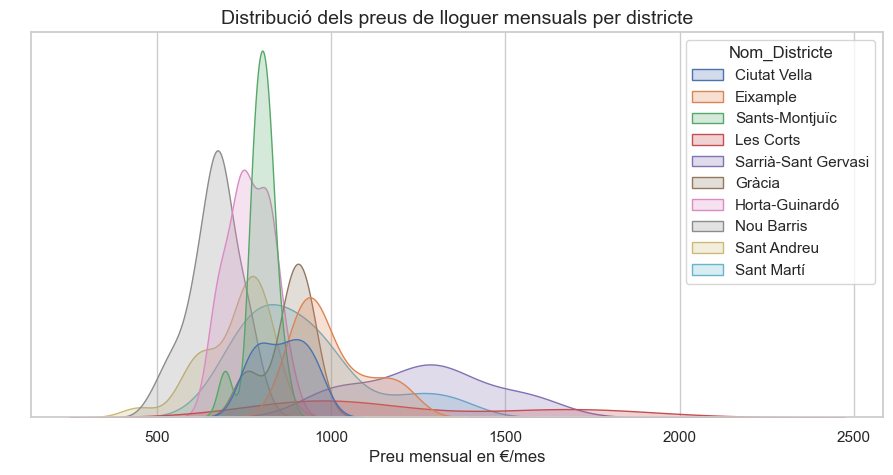

In [34]:
# seaborn :

sns.kdeplot(data=mensual, x="Preu",hue="Nom_Districte", fill=True)
sns.set(rc={"figure.figsize":(11, 5)})
sns.set_style("whitegrid")

plt.title('Distribució dels preus de lloguer mensuals per districte', fontsize=14)
plt.xlabel('Preu mensual en €/mes', fontsize=12)
plt.ylabel(' ', fontsize=12)

# disabling yticks by setting yticks to an empty list
plt.yticks([])  

# Exportar el gràfic:
plt.savefig('Sprint4_9.png', dpi=150, transparent=True) 

plt.show()

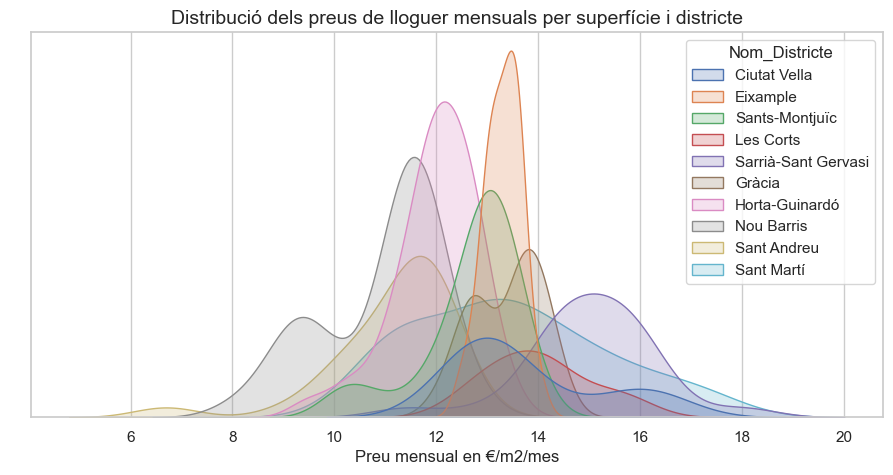

In [36]:
# seaborn :

sns.kdeplot(data=m2_mes, x="Preu",hue="Nom_Districte", fill=True)
sns.set(rc={"figure.figsize":(11, 5)})
sns.set_style("whitegrid")

plt.title('Distribució dels preus de lloguer mensuals per superfície i districte', fontsize=14)
plt.xlabel('Preu mensual en €/m2/mes', fontsize=12)
plt.ylabel(' ', fontsize=12)

# disabling yticks by setting yticks to an empty list
plt.yticks([])  

# Exportar el gràfic:
plt.savefig('Sprint4_10.png', dpi=150, transparent=True) 

plt.show()

- Veiem com que per molt diferents que siguin aquest dos gràfics, les conclusions que podem extreure son les mateixes 
- La intensitat de color al heatmap els la mateixa que la dels picos del gràfic de distribució / densitat

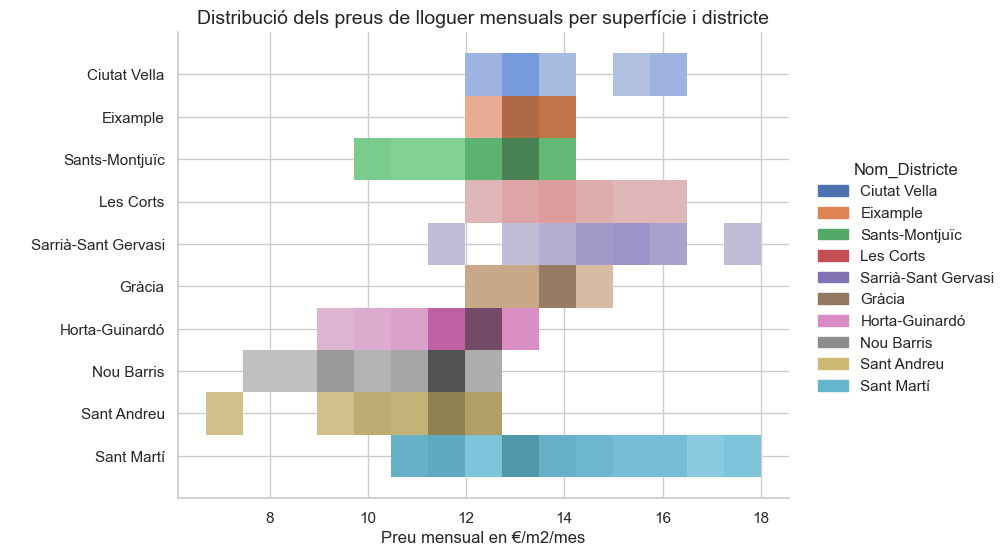

In [37]:
# seaborn :
sns.displot(m2_mes, x="Preu", y="Nom_Districte", hue="Nom_Districte", bins=15, height=5.5, aspect=1.5)

plt.title('Distribució dels preus de lloguer mensuals per superfície i districte', fontsize=14)
plt.xlabel('Preu mensual en €/m2/mes', fontsize=12)
plt.ylabel(' ', fontsize=12)

# Exportar el gràfic:
plt.savefig('Sprint4_11.png', dpi=150, transparent=True) 

plt.show()

### **1.4 Visualització per dues variables numèriques (Any o Trimestre i Preu)**


- Aquest gràfic de categories mostra que la tendència principal forma un nucli que no varia molt entre trimestres, encara que els extrems pujin i baixin : 
- centralitat de 11 a 14,50 €/m2 al mes.

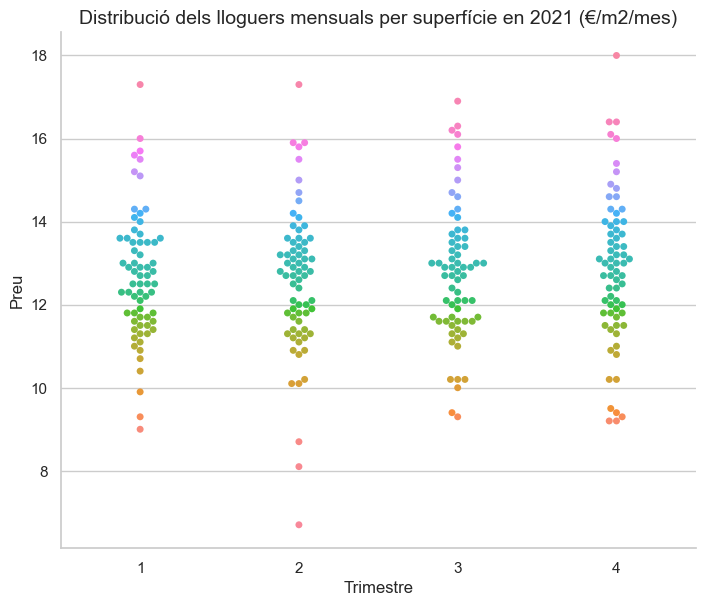

In [38]:
mensual = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]
mensual.sort_values(by=['Preu'], ascending=False)

g=sns.catplot(data=m2_mes, x="Trimestre", y="Preu", hue="Preu", kind="swarm", height=6, aspect=1.2)
plt.title('Distribució dels lloguers mensuals per superfície en 2021 (€/m2/mes)', fontsize=14)
g._legend.remove()

# Exportar el gràfic:
g.savefig('Sprint4_12.png')
plt.savefig('Sprint4_12.png', dpi=150, transparent=True) 

plt.show()

### **1.5 Visualització per tres variables (Barri o Districte, Trimestre i Preu)**

- Aquest gràfic de categories mostra que la tendència principal forma un nucli que no varia molt entre trimestres, encara que els extrems pujin i baixin : 
    - de 600-650 a 1000 €/al mes.

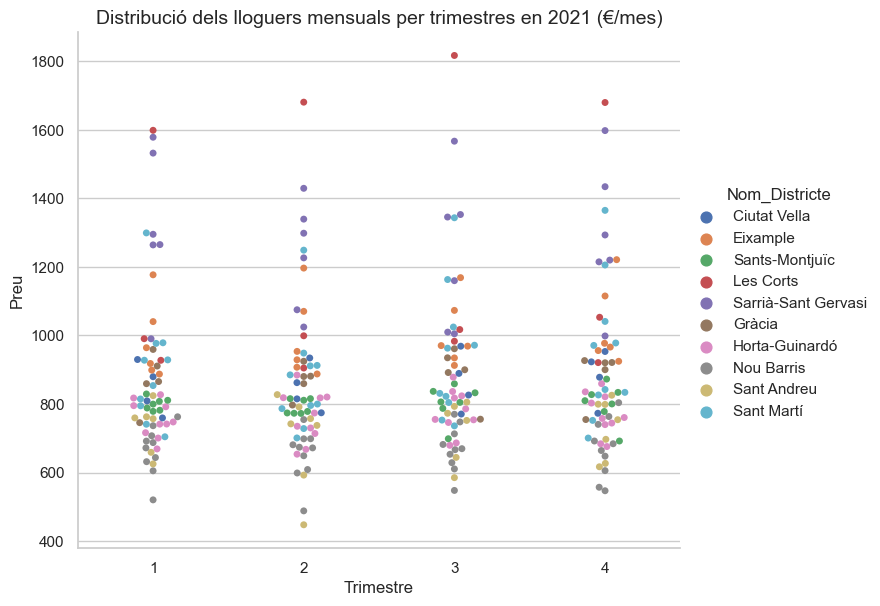

In [39]:
import seaborn as sns

mensual = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]
mensual.sort_values(by=['Preu'], ascending=False)

sns.catplot(data=mensual, x="Trimestre", y="Preu", hue="Nom_Districte", kind="swarm", height=6, aspect=1.2)
plt.title('Distribució dels lloguers mensuals per trimestres en 2021 (€/mes)', fontsize=14)

# Exportar el gràfic:
plt.savefig('Sprint4_13.png', dpi=150, transparent=True) 

plt.show()

## Exercici 2 : Exporta les imatges en format .HTML o .PNG.


- S'han guardat els gràfics a partir de les seves celul·les corresponents amb alguns dels següents mètodes :

    - g.savefig('plot.png')

    - plt.savefig('plot.png', dpi=150)


## Exercici 3 : Proposa alguna visualització que creguis que pot resultar interessant.


- Ara que hem vist preus per districtes, es interessant veure com les diferències es disparen encara més quan mirem per barris.
- Els trimestres no semblen tenir massa influència, encara que el tercer i quart semblen tindre preus una mica més alts.
- Els lloguers per superfície i barri exposen les mateixes conclusions que els dels districtes, però amb més extrems encara, tot i que marquant clarament una línia central.

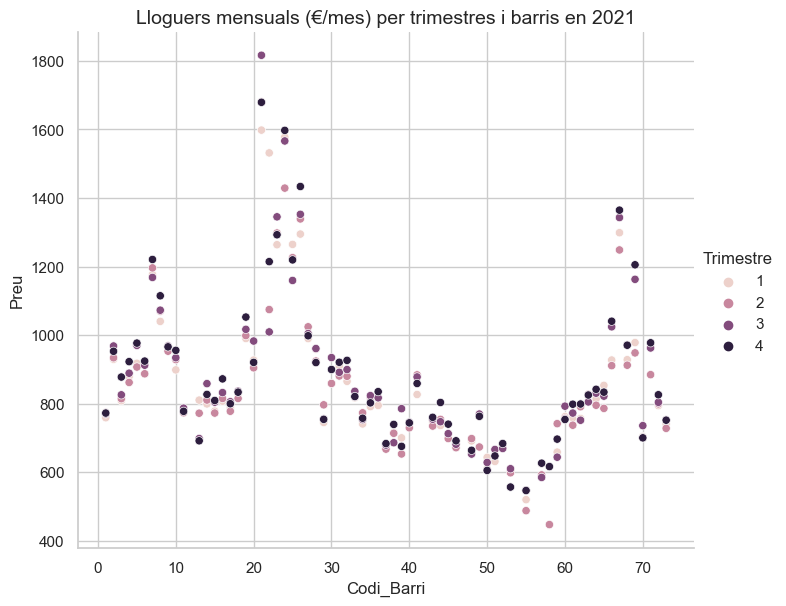

In [40]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.relplot(data=mensual, x="Codi_Barri", y="Preu", hue="Trimestre", height=6, aspect=1.2)
plt.title('Lloguers mensuals (€/mes) per trimestres i barris en 2021', fontsize=14)

# Exportar el gràfic:
plt.savefig('Sprint4_14.png', dpi=150, transparent=True) 

plt.show()

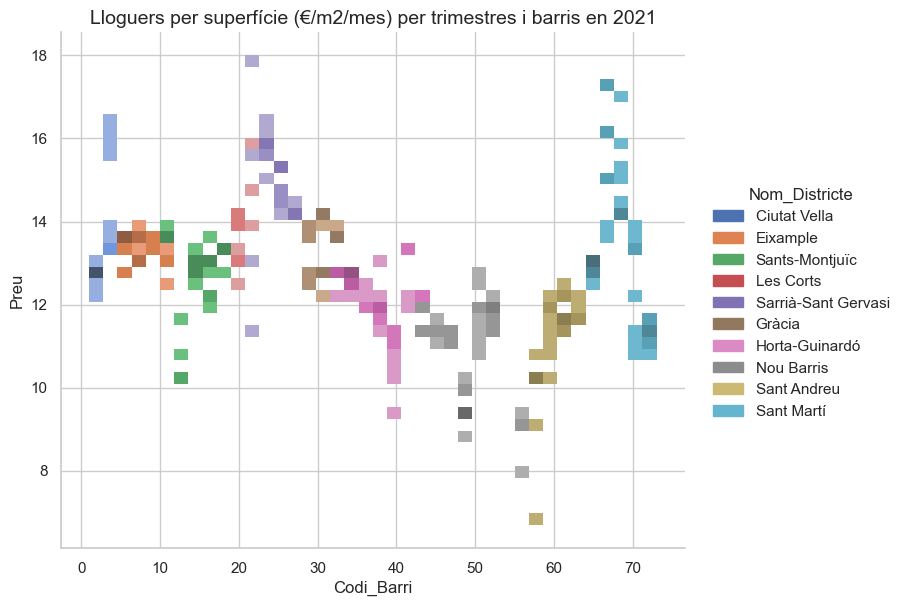

In [41]:
# seaborn :
sns.displot(m2_mes, x="Codi_Barri", y="Preu", hue="Nom_Districte", bins=40, height=6, aspect=1.2)
plt.title('Lloguers per superfície (€/m2/mes) per trimestres i barris en 2021', fontsize=14)

# Exportar el gràfic:
plt.savefig('Sprint4_15.png', dpi=150, transparent=True) 

plt.show()